In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

from pg_networks.gcn import GCN

In [8]:
model_path = 'pg_models/15057.182069204_best_model.pth'

In [9]:
model = GCN(in_channels=512, out_channels=2)
model.load_state_dict(torch.load(model_path))
model.eval()
model.double()

RuntimeError: Error(s) in loading state_dict for GCN:
	size mismatch for conv1.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([512, 1024]).
	size mismatch for conv1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for conv2.weight: copying a param with shape torch.Size([512, 512]) from checkpoint, the shape in current model is torch.Size([1024, 1024]).
	size mismatch for conv2.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for conv3.weight: copying a param with shape torch.Size([512, 1024]) from checkpoint, the shape in current model is torch.Size([1024, 2048]).
	size mismatch for conv3.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for lin1.weight: copying a param with shape torch.Size([512, 1024]) from checkpoint, the shape in current model is torch.Size([1024, 2048]).
	size mismatch for lin1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for lin2.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([512, 1024]).
	size mismatch for lin2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for lin3.weight: copying a param with shape torch.Size([2, 256]) from checkpoint, the shape in current model is torch.Size([2, 512]).

In [11]:
our_pred_path = 'evaluations/bmx-trees/00034.png'
osvos_pred_path = 'OSVOS_PyTorch/models/Results_OSVOS_Tim/vgg_test_seqs/bmx-trees/00034.png'

In [33]:
def compute_combo_img(our_pred, osvos_pred):
    
    plt.figure(figsize=(10, 7))
    plt.imshow(our_pred, cmap='gray')
    plt.show()
        
    # Dilate our image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15, 15))
    our_pred = cv2.dilate(our_pred, kernel, iterations=1)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(our_pred, cmap='gray')
    plt.show()
    
    plt.figure(figsize=(10, 7))
    plt.imshow(osvos_pred, cmap='gray')
    plt.show()
    
    combo_pred = np.where(np.logical_and(our_pred==255, osvos_pred==255), 1, 0)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(combo_pred, cmap='gray')
    plt.show()    

(480, 854)


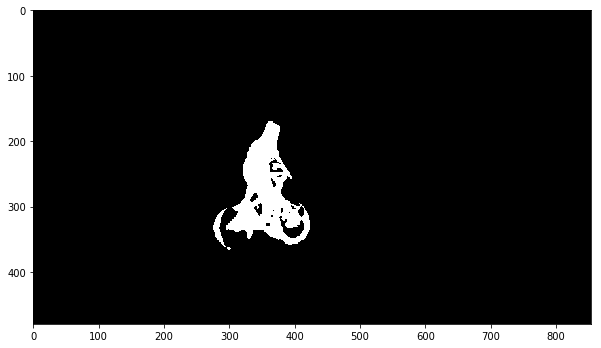

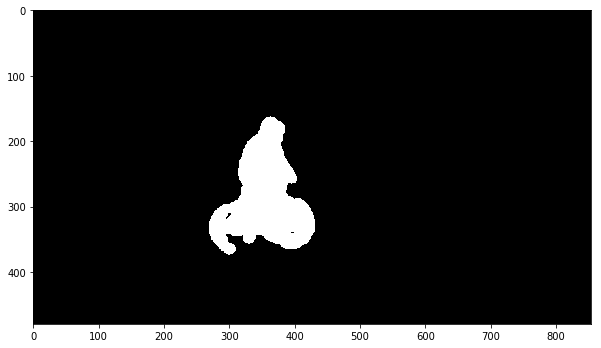

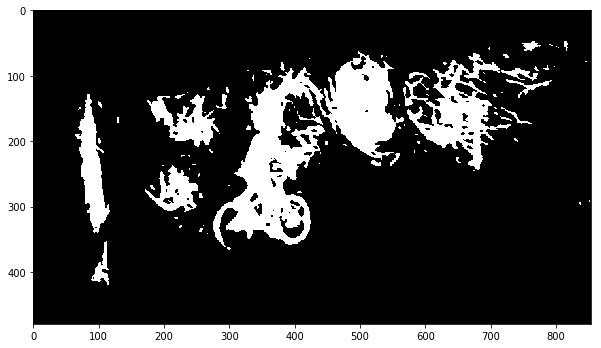

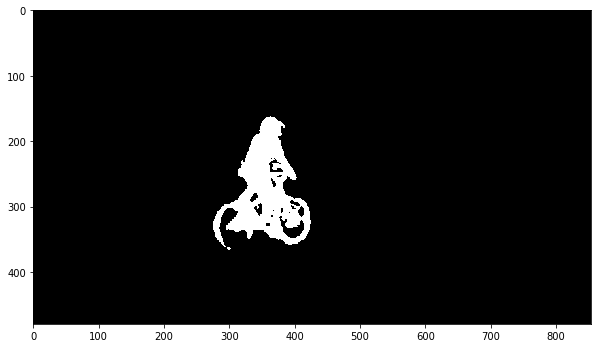

In [34]:
our_pred = cv2.imread(our_pred_path)
our_pred = cv2.cvtColor(our_pred, cv2.COLOR_RGB2GRAY)

osvos_pred = cv2.imread(osvos_pred_path)
osvos_pred = cv2.cvtColor(osvos_pred, cv2.COLOR_RGB2GRAY)

print(our_pred.shape)

compute_combo_img(our_pred, osvos_pred)